In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
from neuron import h
import plot_helper as ph
import pickle
#from scalebary import add_scalebar

In [3]:
run_file = './run_model_cori.hoc'
paramsCSV = '/Users/xander/axonstandardized/ToyModel/make_paramset_hdf5/params_reference/params_hh.csv'
orig_params = h5py.File('/Users/xander/axonstandardized/ToyModel/params/params_hh_full_1000.hdf5', 'r')['orig_full'][0]
scores_path = './scores_1000/'
objectives_file = h5py.File('/Users/xander/axonstandardized/ToyModel/analyze_p/optimization_results_path/multi_stim_hh_full_20_stims_1000.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
score_function_ordered_list = objectives_file['ordered_score_function_list'][:]
stims_path = './stims/stims_full.hdf5'
orig_params = [0.12, 0.036, 0.0003]
# Number of timesteps for the output volt.
ntimestep = 10000
# Value of dt in miliseconds
dt = 0.02

def run_model(param_set, stim_name_list):
	h.load_file(run_file)
	volts_list = []
	for elem in stim_name_list:
		curr_stim = h5py.File(stims_path, 'r')[elem][:]
		total_params_num = len(param_set)
		timestamps = np.array([dt for i in range(ntimestep)])
		h.curr_stim = h.Vector().from_python(curr_stim)
		h.transvec = h.Vector(total_params_num, 1).from_python(param_set)
		h.stimtime = h.Matrix(1, len(timestamps)).from_vector(h.Vector().from_python(timestamps))
		h.ntimestep = ntimestep
		h.runStim()
		out = h.vecOut.to_python()
		volts_list.append(out)
	return np.array(volts_list)

In [4]:
best_indv_number = 5
best_indv_path = f"/Users/xander/axonstandardized/ToyModel/best_indv_logs/best_indvs_gen_{best_indv_number}.pkl"
with open(best_indv_path,'rb') as f:
    best_indvs = pickle.load(f)
best_indv = best_indvs[-1]

In [9]:
num_stims = 10
step = 2
stim_name_list = opt_stim_name_list[:num_stims*step:step] # use "num_stims" only
true_volts = run_model(orig_params, stim_name_list)
best_volts = run_model(best_indv, stim_name_list)

finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix


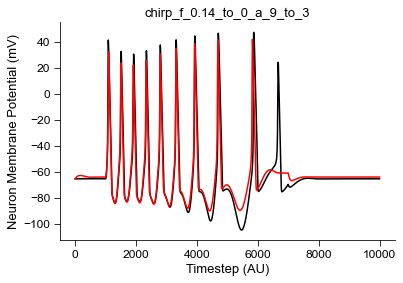

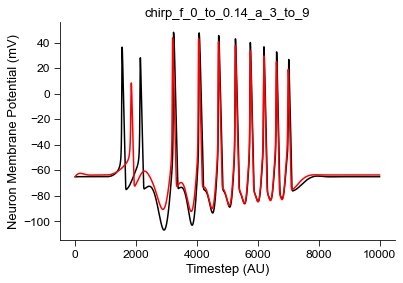

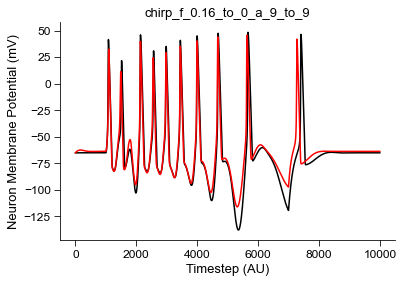

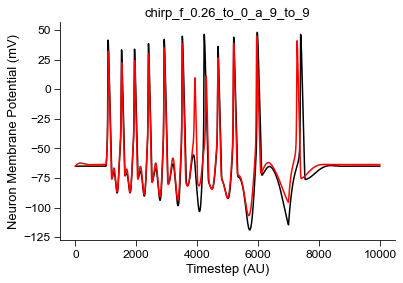

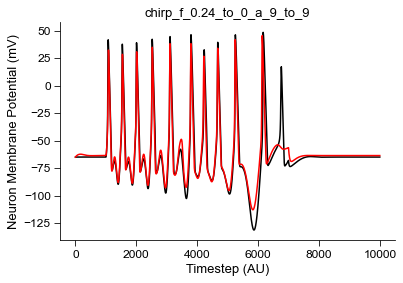

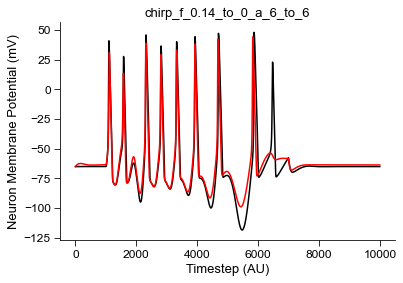

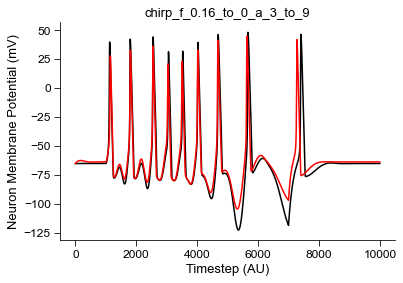

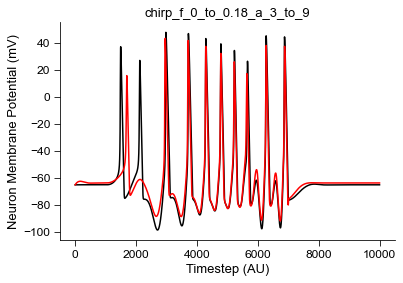

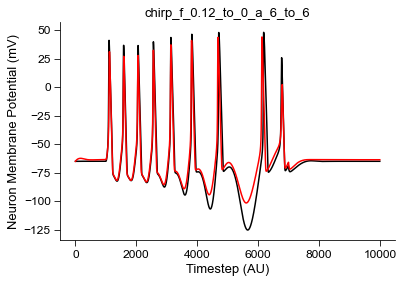

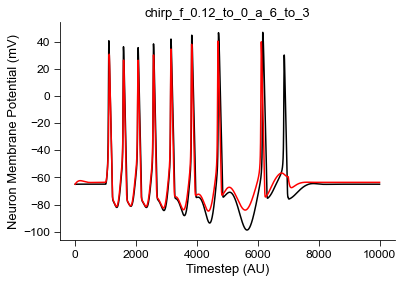

In [10]:
for i in range(num_stims):
    fig = plt.figure()
    plt.title(stim_name_list[i].decode('ascii'))
    plt.plot(true_volts[i], label='ground truth', color='black')
    plt.plot(best_volts[i], label='bestIndv', color='red')
    plt.ylabel('Neuron Membrane Potential (mV)')
    plt.xlabel('Timestep (AU)')
    if i > 10:
        print("if you want to start plotting more than 10 stims we need to save them in plots folder")
        raise NotImplementedError
    

In [11]:
best_indv

[0.07195393285553701, 0.03188664311527032, 0.0004911769129224774]